In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 문제 1

In [ ]:
# 경로 설정
path = "./drive/MyDrive/colab/ML_lab/"
file = path+"lab4_tic_tac_toe.csv"

# 파일을 읽어 전체 샘플의 개수와 각 샘플의 크기를 파악
df = pd.read_csv(file)
total_number_of_sample = len(df)
sample_size = len(df.columns)

# 마지막 열을 label로, 나머지 열들을 feature로 하여 분리
x_data_cols = [i for i in range(sample_size - 1)]
y_data_cols = [sample_size - 1]
x_data = pd.read_csv(file, usecols=x_data_cols).values
y_data = pd.read_csv(file, usecols=y_data_cols).values.reshape(-1,)

# 데이터를 train set : test set = 3 : 1 비율로 나눔
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print("테스트 셀의 정확도: {:.3f}".format(np.mean(y_pred==y_test)))

테스트 셀의 정확도: 0.917


## 문제 2

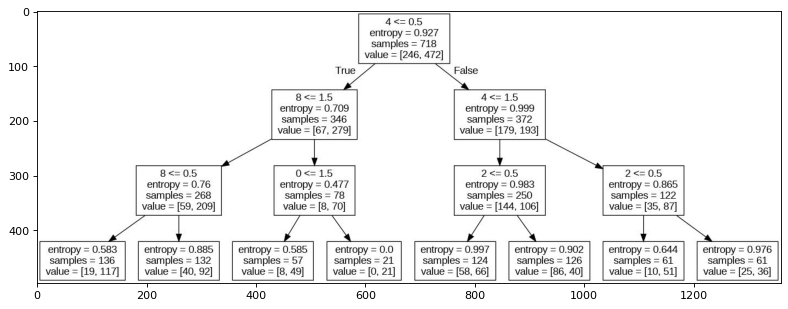

In [ ]:
tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

export_graphviz(tree, out_file="./decision_tree.dot", feature_names=x_data_cols)
!dot -Tjpg decision_tree.dot -o decision_tree.jpg
dec_tree_img = plt.imread('./decision_tree.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)



## 문제 3

In [ ]:
def get_entropy(data):
  classes = list(set(data))
  number_of_data = len(data)
  num_of_samples_in_each_class = Counter(data)

  entropy = 0
  for cls in classes:
    p = num_of_samples_in_each_class[cls] / number_of_data
    entropy -= p * np.log2(p)

  return entropy

In [ ]:
def get_information_gains(data, data_size, sample_size, upper_entropy):
  igs = []
  for i in range(sample_size - 1): # 각 속성을 기준으로 분할하여 information gain을 구함
    classified_by_i = {}

    for sample in data: # 각 sample의 해당 속성 값을 찾아 분할
      if sample[i] not in classified_by_i.keys():
        classified_by_i[sample[i]] = [sample[sample_size - 1]]
      else:
        classified_by_i[sample[i]].append(sample[sample_size - 1])

    # 분할된 결과에 대한 엔트로피를 구함
    sub_entropy = 0
    for key in classified_by_i.keys():
      sub_entropy += (len(classified_by_i[key]) / data_size) * get_entropy(classified_by_i[key])

    # 공식에 따라 정보 이득을 계산하여 리스트에 추가. upper_entropy는 H(S)
    ig = upper_entropy - sub_entropy
    igs.append(ig)

  return igs

In [ ]:
def get_best_attribute(data):
  data_size = len(data)
  sample_size = len(data[0])

  labels = []
  for sample in data:
    labels.append(sample[sample_size - 1])

  upper_entropy = get_entropy(labels) # H(S) 구하기

  igs = get_information_gains(data, data_size, sample_size, upper_entropy)
  max_IG = max(igs) # 최대 정보이득 구하기

  best_attribute = igs.index(max_IG) # 최대 정보 이득을 갖는 속성 찾기

  return best_attribute

In [ ]:
data = df.values
best_attribute = get_best_attribute(data)

print("Best Att", best_attribute)

Best Att 4
